In [1]:
import pandas as pd
pd.option_context("display.max_rows", None, "display.max_columns", None)
# %%
def load_cpg_enrichment_data(file_path):
    """
    Loads the CpG enrichment data from the specified CSV file into a pandas DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: A DataFrame containing the CpG enrichment data.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [2]:
base_dir = "D:/Github/SRF_MeCP2_cut_tag/iterative_alternative/results/no_dedup/cpg_enrichment"
file_path = f"{base_dir}/Neu/broad/cpg_enrichment_1_rep_in_peaks/cpg_enrichment_parallel.csv"
cpg_data = load_cpg_enrichment_data(file_path)
print(cpg_data.shape)
cpg_data.head()

(15155, 24)


,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,...,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
0,chr1,3670619,3671074,48.553010,36.378130,1.334676,1.0,both,both,False,...,1937,455,CpG:,613,3,1,6.08946;8.05807;5.49517,12.1862,3670618,3672555
1,chr1,3671654,3672156,48.553010,36.378130,1.334676,1.0,both,both,False,...,1937,502,CpG:,613,3,2,6.08946;8.05807;5.49517,14.2013;12.1862,3670618,3672555
2,chr1,4496947,4497608,5.909448,14.458656,0.408714,1.0,both,both,False,...,2089,661,CpG:,619,1,1,3.0083,4.61906,4496514,4498603
3,chr1,4571641,4572075,20.994651,18.831086,1.114893,1.0,both,both,False,...,643,434,CpG:,619,3,1,3.91321;3.39512;3.76449,4.05345,4571501,4572144
4,chr1,4689184,4689397,12.116976,11.276507,1.074533,1.0,both,endo_only,False,...,910,213,CpG:,620,0,1,NaN,3.96057,4688527,4689437


In [3]:
cpg_data = cpg_data[["chr", "start", "end", "binding_type", "binding_type_by_peaks", "exo_replicates_with_peaks", "endo_replicates_with_peaks"]]
print(cpg_data.binding_type.unique())
print(cpg_data.binding_type_by_peaks.unique())

['both' 'exo_only' 'endo_only']
['both' 'endo_only' 'exo_only']


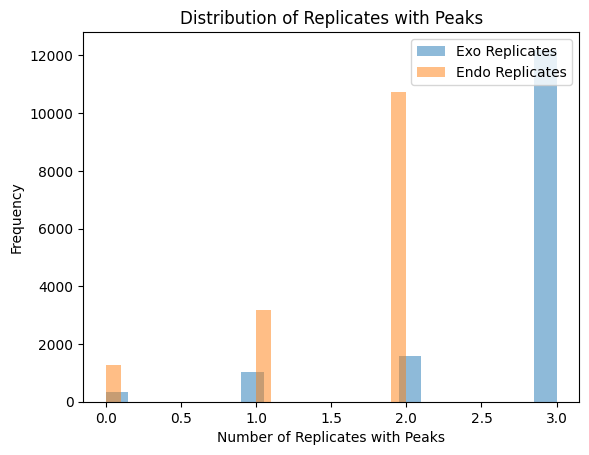

In [4]:
import matplotlib.pyplot as plt

plt.hist(cpg_data["exo_replicates_with_peaks"], bins=20, alpha=0.5, label="Exo Replicates")
plt.hist(cpg_data["endo_replicates_with_peaks"], bins=20, alpha=0.5, label="Endo Replicates")
plt.xlabel("Number of Replicates with Peaks")
plt.ylabel("Frequency")
plt.title("Distribution of Replicates with Peaks")
plt.legend(loc='upper right')
plt.show()

In [5]:
cpgs_path = "D:/Github/SRF_MeCP2_cut_tag/data/cpg_islands.bed"
cpgs = pd.read_csv(cpgs_path, sep="\t", header=None)
print(cpgs.shape)
cpgs.head()

(17017, 6)


,0,1,2,3,4,5
0,chr1,3531624,3531843,611,CpG:,27
1,chr1,3670619,3671074,613,CpG:,34
2,chr1,3671654,3672156,613,CpG:,45
3,chr1,4491701,4493673,619,CpG:,165
4,chr1,4496947,4497608,619,CpG:,47


In [6]:
cpgs.columns = ["chr", "start", "end", "id", "cpg", "number"]
cpgs = cpgs[["chr", "start", "end"]]
cpgs

,chr,start,end
0,chr1,3531624,3531843
1,chr1,3670619,3671074
2,chr1,3671654,3672156
3,chr1,4491701,4493673
4,chr1,4496947,4497608
...,...,...,...
17012,chrX_KQ030495_fix,273660,273909
17013,chrX_KZ289093_fix,15344,15622
17014,chrX_KZ289094_fix,111224,111682
17015,chrX_KZ289094_fix,137901,138359


In [7]:
cpgs_targeted = pd.merge(cpgs, cpg_data[["chr", "start", "end"]], on=["chr", "start", "end"], how="inner")
cpgs_nottargeted = pd.merge(cpgs, cpgs_targeted[["chr", "start", "end"]], on=["chr", "start", "end"], how="left", indicator=True)
cpgs_nottargeted = cpgs_nottargeted[cpgs_nottargeted['_merge'] == 'left_only'].drop('_merge', axis=1)
cpgs_nottargeted = cpgs_nottargeted[["chr", "start", "end"]]

print(f"Shape of targeted cpgs: {cpgs_targeted.shape}")
print(f"Shape of not targeted cpgs: {cpgs_nottargeted.shape}")

# %% 
cpgs_targeted.head()
cpgs_targeted.to_csv("D:/Github/SRF_MeCP2_cut_tag/data/neu_cpg_targets.bed", sep="\t", header=False, index=False)

Shape of targeted cpgs: (15155, 3)
Shape of not targeted cpgs: (1862, 3)


In [8]:
cpgs_nottargeted.head()
cpgs_nottargeted.to_csv("D:/Github/SRF_MeCP2_cut_tag/data/neu_cpg_not_targets.bed", sep="\t", header=False, index=False)

#######################################################################################################################
#######################################################################################################################
#######################################################################################################################
#######################################################################################################################

In [9]:
file_path = f"{base_dir}/NSC/broad/cpg_enrichment_1_rep_in_peaks/cpg_enrichment_parallel.csv"
cpg_data = load_cpg_enrichment_data(file_path)
print(cpg_data.shape)
cpg_data.head()

(14939, 24)


,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,...,region_length,cpg_length,cpg_score,cpg_name,exo_replicates_with_peaks,endo_replicates_with_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,region_start,region_end
0,chr1,3531624,3531843,12.768126,30.869522,0.413616,1.0,both,endo_only,False,...,416,219,CpG:,611,0,1,NaN,5.10095,3531809,3532225
1,chr1,3670619,3671074,13.804590,6.752549,2.044352,0.4,both,exo_only,False,...,1583,455,CpG:,613,1,0,6.06037,NaN,3670396,3671979
2,chr1,3671654,3672156,15.331182,5.965003,2.570188,0.1,both,exo_only,False,...,1792,502,CpG:,613,2,0,5.54931;6.06037,NaN,3670396,3672188
3,chr1,4491701,4493673,8.716315,10.776053,0.808860,1.0,both,both,False,...,1360,1972,CpG:,619,2,1,6.0982;5.8282,4.1282,4492093,4493453
4,chr1,4571641,4572075,25.026296,0.076022,329.197490,0.5,both,exo_only,False,...,786,434,CpG:,619,3,0,4.35039;6.82732;3.40697,NaN,4571438,4572224


In [10]:
cpg_data = cpg_data[["chr", "start", "end", "binding_type", "binding_type_by_peaks", "exo_replicates_with_peaks", "endo_replicates_with_peaks"]]
print(cpg_data.binding_type.unique())
print(cpg_data.binding_type_by_peaks.unique())

['both' 'exo_only' 'endo_only']
['endo_only' 'exo_only' 'both']


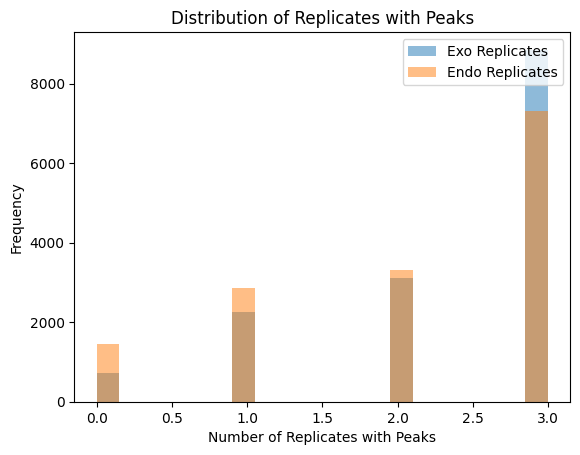

In [11]:
import matplotlib.pyplot as plt

plt.hist(cpg_data["exo_replicates_with_peaks"], bins=20, alpha=0.5, label="Exo Replicates")
plt.hist(cpg_data["endo_replicates_with_peaks"], bins=20, alpha=0.5, label="Endo Replicates")
plt.xlabel("Number of Replicates with Peaks")
plt.ylabel("Frequency")
plt.title("Distribution of Replicates with Peaks")
plt.legend(loc='upper right')
plt.show()

In [12]:
cpgs_path = "D:/Github/SRF_MeCP2_cut_tag/data/cpg_islands.bed"
cpgs = pd.read_csv(cpgs_path, sep="\t", header=None)
print(cpgs.shape)
cpgs.head()

(17017, 6)


,0,1,2,3,4,5
0,chr1,3531624,3531843,611,CpG:,27
1,chr1,3670619,3671074,613,CpG:,34
2,chr1,3671654,3672156,613,CpG:,45
3,chr1,4491701,4493673,619,CpG:,165
4,chr1,4496947,4497608,619,CpG:,47


In [13]:
cpgs.columns = ["chr", "start", "end", "id", "cpg", "number"]
cpgs = cpgs[["chr", "start", "end"]]
cpgs

,chr,start,end
0,chr1,3531624,3531843
1,chr1,3670619,3671074
2,chr1,3671654,3672156
3,chr1,4491701,4493673
4,chr1,4496947,4497608
...,...,...,...
17012,chrX_KQ030495_fix,273660,273909
17013,chrX_KZ289093_fix,15344,15622
17014,chrX_KZ289094_fix,111224,111682
17015,chrX_KZ289094_fix,137901,138359


In [14]:
cpgs_targeted = pd.merge(cpgs, cpg_data[["chr", "start", "end"]], on=["chr", "start", "end"], how="inner")
cpgs_nottargeted = pd.merge(cpgs, cpgs_targeted[["chr", "start", "end"]], on=["chr", "start", "end"], how="left", indicator=True)
cpgs_nottargeted = cpgs_nottargeted[cpgs_nottargeted['_merge'] == 'left_only'].drop('_merge', axis=1)
cpgs_nottargeted = cpgs_nottargeted[["chr", "start", "end"]]

print(f"Shape of targeted cpgs: {cpgs_targeted.shape}")
print(f"Shape of not targeted cpgs: {cpgs_nottargeted.shape}")

# %% 
cpgs_targeted.head()
cpgs_targeted.to_csv("D:/Github/SRF_MeCP2_cut_tag/data/nsc_cpg_targets.bed", sep="\t", header=False, index=False)

Shape of targeted cpgs: (14939, 3)
Shape of not targeted cpgs: (2078, 3)


In [15]:
cpgs_nottargeted.head()
cpgs_nottargeted.to_csv("D:/Github/SRF_MeCP2_cut_tag/data/nsc_cpg_not_targets.bed", sep="\t", header=False, index=False)